In [152]:
!pip install scikit-learn

!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [156]:
#liste des librairies utilisées

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

In [8]:
#Récupération des données sur Github 

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)
print(data.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


1. Collecte et préparation des données

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [10]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


2. Analyse exploratoire des données

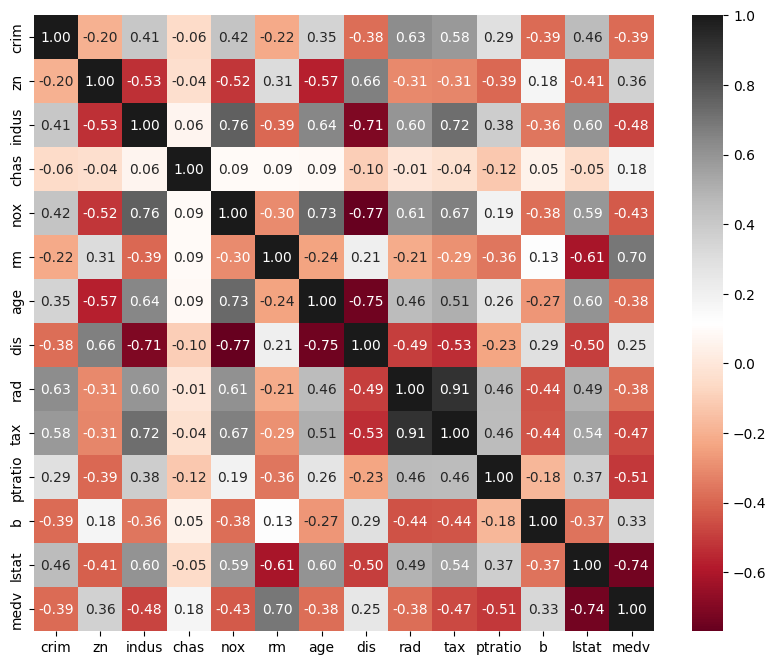

In [46]:
# Matrice de corrélation
correlation_matrix=data.corr()
# Création d'une heatmap
plt.figure(figsize=(10,8))  # Taille de la figure
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdGy', cbar=True)
plt.show()


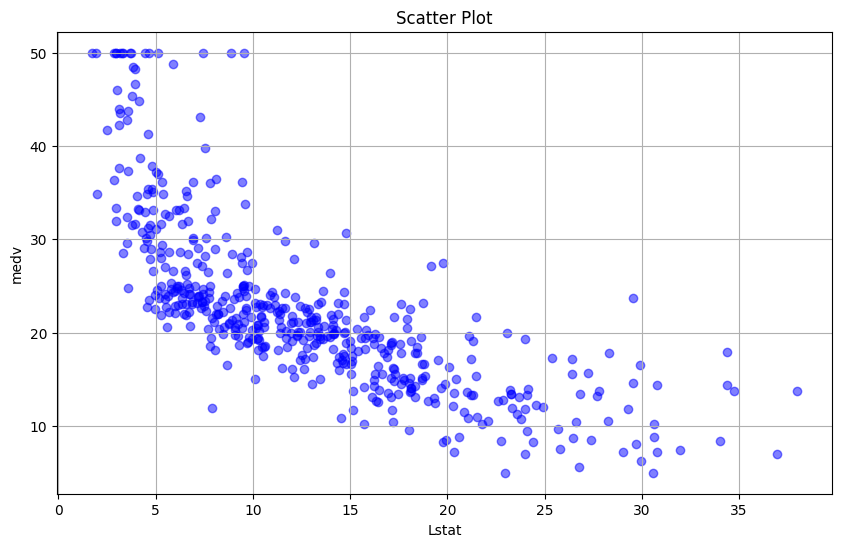

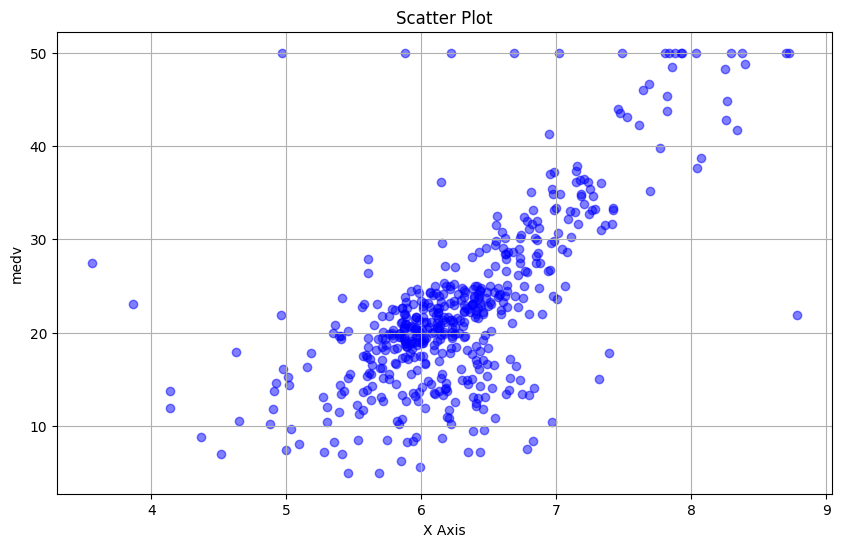

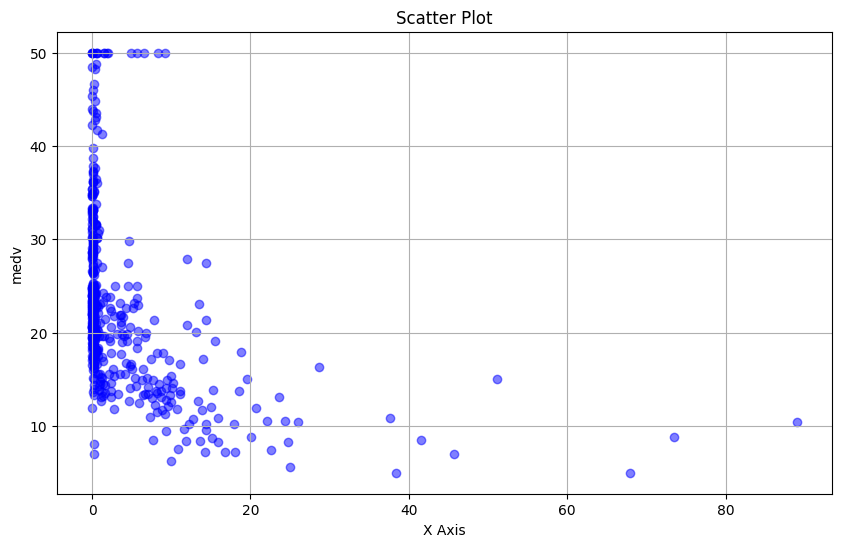

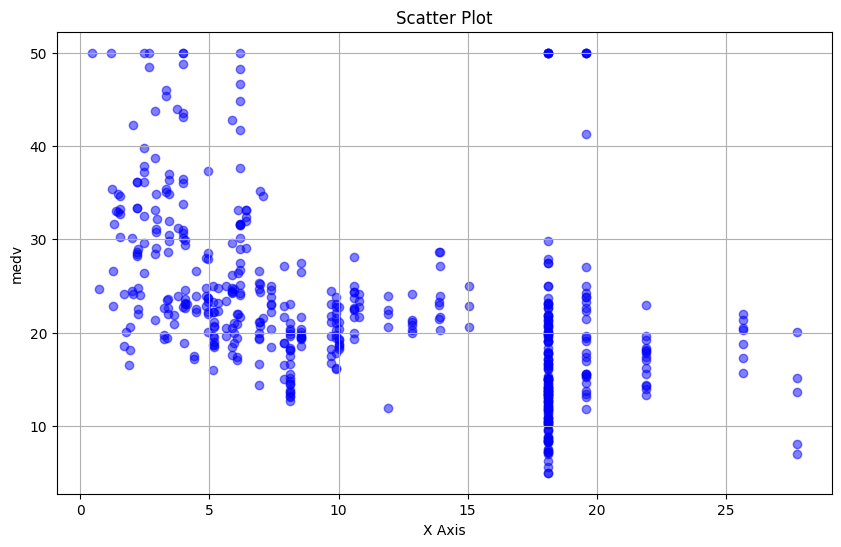

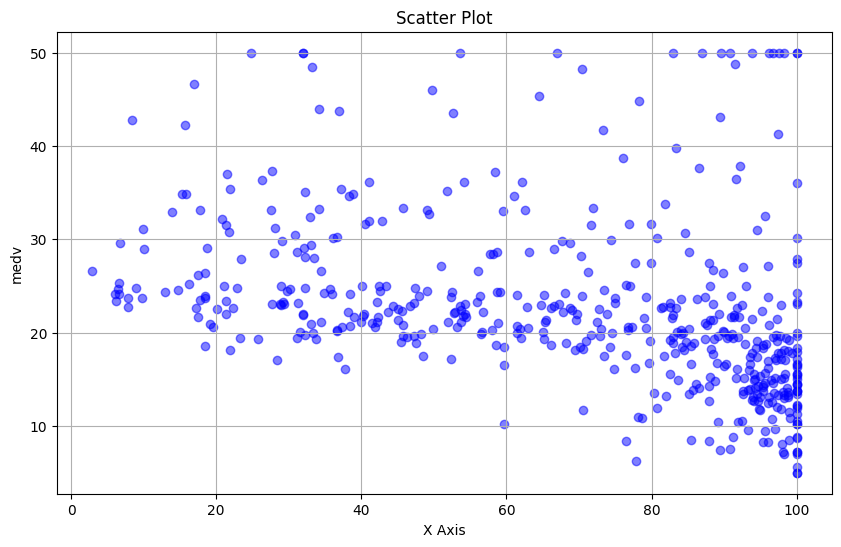

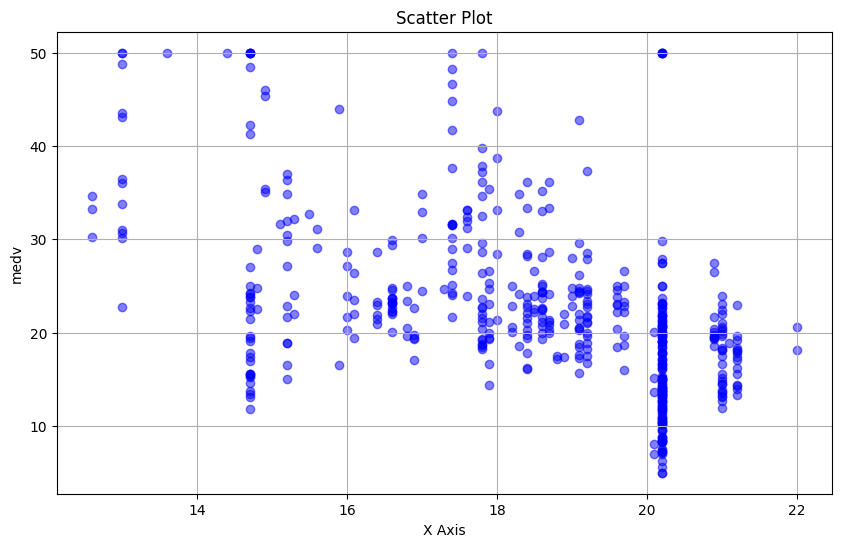

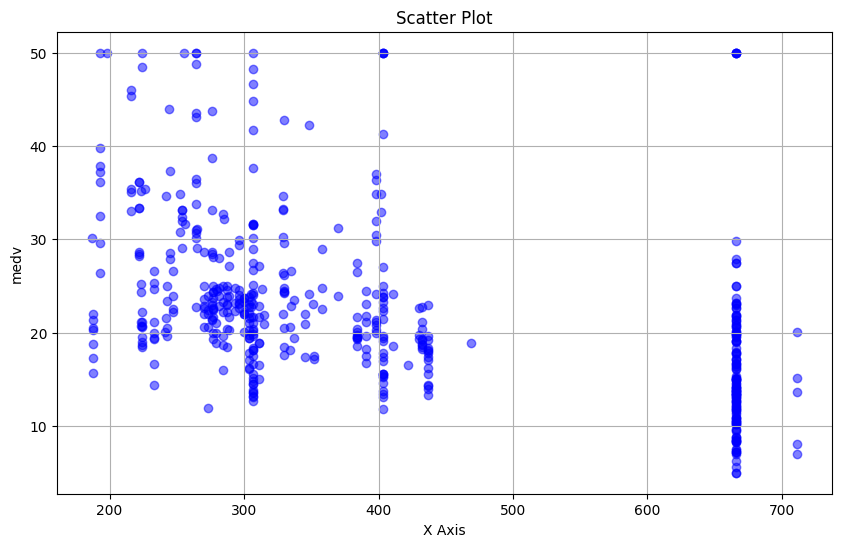

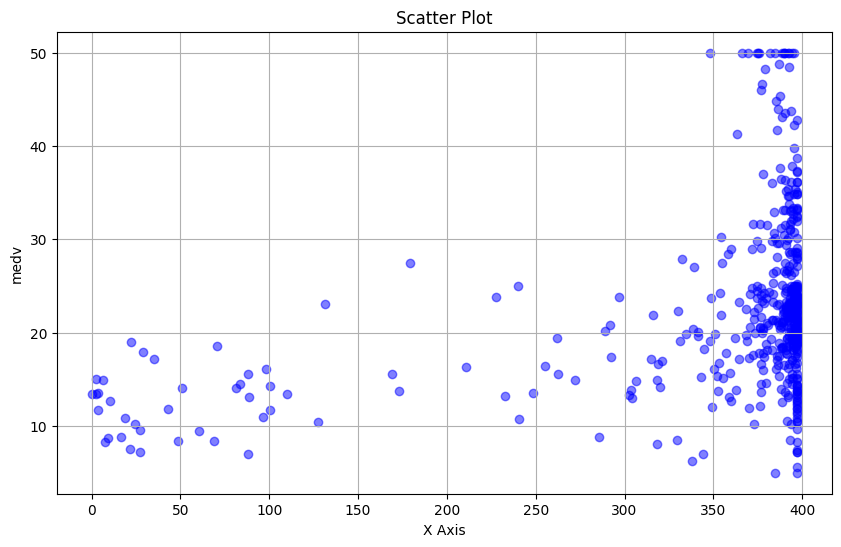

In [157]:
#pnuages de points entre la variable target et les variables de prédiction

def plot_scatter(data, x_var, y_var, title='Scatter Plot', xlabel='X Axis', ylabel='Y Axis', color='blue', alpha=0.5):
    """
    Génère un nuage de points des variables spécifiées dans un DataFrame.

    Paramètres:
    - data : DataFrame de Pandas contenant les données.
    - x_var : str, nom de la colonne pour l'axe des abscisses.
    - y_var : str, nom de la colonne pour l'axe des ordonnées.
    - title : str, le titre du graphique.
    - xlabel : str, le label de l'axe des abscisses.
    - ylabel : str, le label de l'axe des ordonnées.
    - color : str, couleur des points dans le graphique.
    - alpha : float, transparence des points dans le graphique.
    """
    plt.figure(figsize=(10, 6))  # Taille du graphique
    plt.scatter(data[x_var], data[y_var], color=color, alpha=alpha)  # Création du scatter plot
    plt.title(title)  # Ajout du titre
    plt.xlabel(xlabel)  # Label de l'axe des abscisses
    plt.ylabel(ylabel)  # Label de l'axe des ordonnées
    plt.grid(True)  # Ajout d'une grille
    plt.show()  # Affichage du graphique


plot_scatter(data,'lstat','medv',ylabel='medv',xlabel='Lstat')
plot_scatter(data,'rm','medv',ylabel='medv')
plot_scatter(data,'crim','medv',ylabel='medv')
plot_scatter(data,'indus','medv',ylabel='medv')
plot_scatter(data,'age','medv',ylabel='medv')
plot_scatter(data,'ptratio','medv',ylabel='medv')
plot_scatter(data,'tax','medv',ylabel='medv')
plot_scatter(data,'b','medv',ylabel='medv')

In [51]:
#Préparation des données

selected=['lstat','rm']
selected_data= data[selected]
selected_data.head()


def normalize_column(data, column_name):
    """
    Normalise une colonne du DataFrame.

    Paramètres:
    - data : DataFrame contenant les données.
    - column_name : str, le nom de la colonne à normaliser.

    Retourne:
    - Series contenant les valeurs normalisées de la colonne.
    """
    min_value = data[column_name].min()
    max_value = data[column_name].max()
    normalized_column = (data[column_name] - min_value) / (max_value - min_value)
    return normalized_column

def standardize_column(data, column_name):
    """
    Standardise une colonne du DataFrame.

    Paramètres:
    - data : DataFrame contenant les données.
    - column_name : str, le nom de la colonne à standardiser.

    Retourne:
    - Series contenant les valeurs standardisées de la colonne.
    """
    mean_value = data[column_name].mean()
    std_deviation = data[column_name].std()
    standardized_column = (data[column_name] - mean_value) / std_deviation
    return standardized_column

stlstat=standardize_column(selected_data, 'lstat')
strm=standardize_column(selected_data, 'rm')
standardized_data=pd.DataFrame({'stlstat':stlstat,'strm': strm})
nlstat=normalize_column(selected_data, 'lstat')
nrm=normalize_column(selected_data, 'rm')
normalized_data=pd.DataFrame({'nlstat':nlstat,'nrm': nrm})

X_train, X_test, y_train, y_test = train_test_split(selected_data, data['medv'], test_size=0.2, random_state=42)
stX_train, stX_test,sty_train,sty_test= train_test_split(standardized_data, data['medv'], test_size=0.2, random_state=42)
nX_train, nX_test, ry_train, ry_test = train_test_split(selected_data, data['medv'], test_size=0.2, random_state=42)


3. Modélisation
4. Optimisation des modèles
5. Visualisation des résultats

In [63]:
#Régression linéaire 

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 31.24329060178364
R² Score: 0.5739577415025856


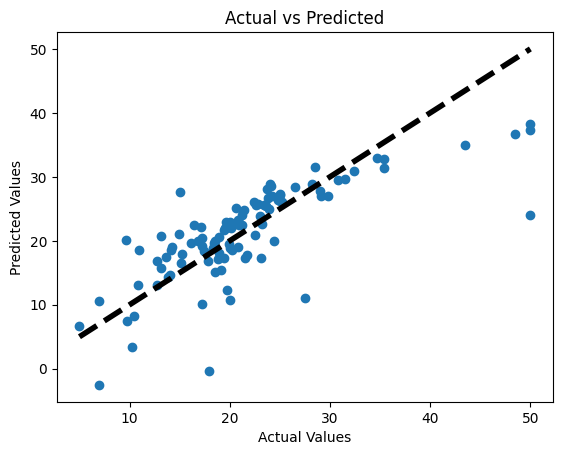

In [64]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Ligne parfaite pour référence
plt.show()




/Users/raph4/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


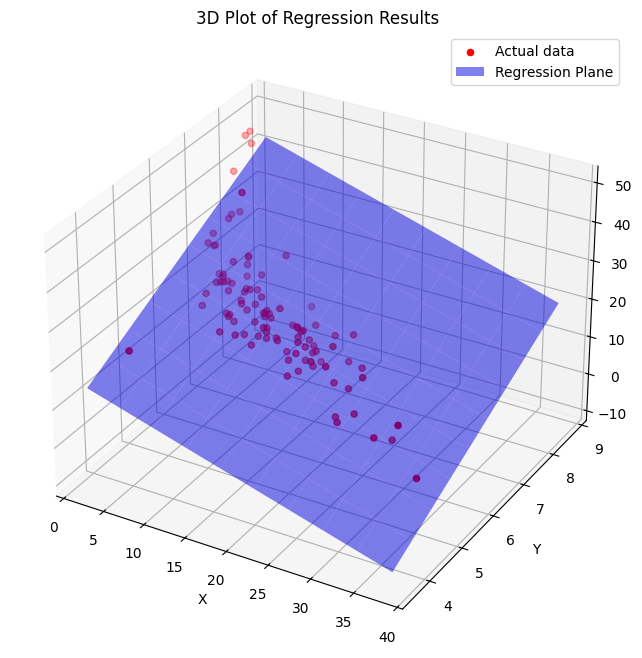

In [67]:

x = np.linspace(selected_data['lstat'].min(), selected_data['lstat'].max(), 10)
y = np.linspace(selected_data['rm'].min(), selected_data['rm'].max(), 10)
x_grid, y_grid = np.meshgrid(x, y)
z_pred = model.predict(np.array([x_grid.ravel(), y_grid.ravel()]).T).reshape(x_grid.shape)

#représentation 3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Nuage de points des données de test
ax.scatter(X_test['lstat'], X_test['rm'], y_test, color='red', label='Actual data')

# Surface de prédiction
ax.plot_surface(x_grid, y_grid, z_pred, color='blue', alpha=0.5, edgecolor='none', label='Regression Plane')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of Regression Results')
ax.legend()

plt.show()


Mean Squared Error: 31.243290601783638
R² Score: 0.5739577415025857


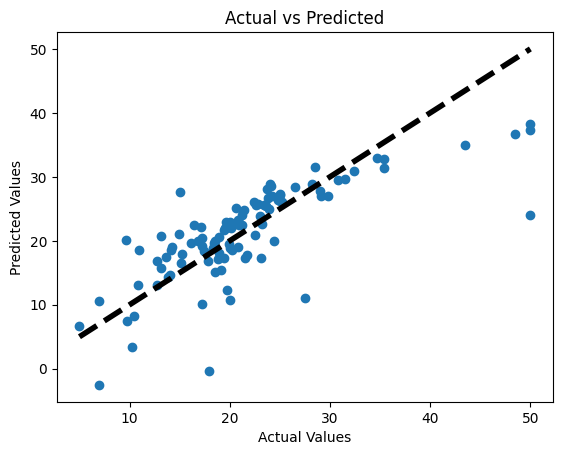

In [69]:
#Régression linéaire sur données standardisées
stmodel = LinearRegression()
stmodel.fit(stX_train, sty_train)
sty_pred = stmodel.predict(stX_test)
stmse = mean_squared_error(sty_test, sty_pred)
str2 = r2_score(sty_test, sty_pred)

print("Mean Squared Error:", stmse)
print("R² Score:", str2)

plt.scatter(sty_test, sty_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([sty_test.min(), sty_test.max()], [sty_test.min(), sty_test.max()], 'k--', lw=4)  # Ligne parfaite pour référence
plt.show()



In [118]:
#Préparation complète des données pour modèles de prédiction complexes
X = data.drop('medv', axis=1)  # Toutes les colonnes sauf la cible
y = data['medv']               # La colonne cible

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [119]:
#Random Forest Model
# Création de l'instance du modèle
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraînement du modèle
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [120]:
# Prédiction sur l'ensemble de test
y_pred = rf.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Mean Squared Error: 8.02232131372549
R² Score: 0.8906053803853673


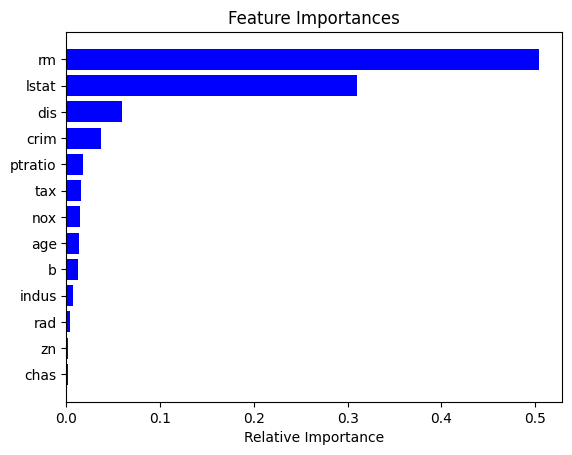

In [121]:


features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


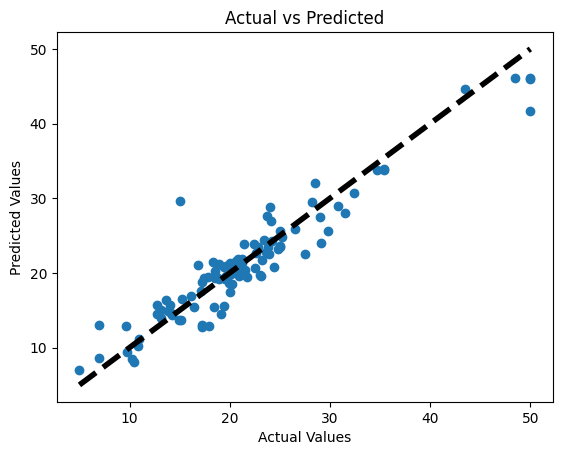

In [75]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Ligne parfaite pour référence
plt.show()

In [124]:
#Optimisation des hyperparamètres du modèle de Random Forest

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n

/Users/raph4/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
56 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/raph4/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raph4/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/raph4/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_const

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

Meilleur modèle: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error du meilleur modèle: 10.231219607843135
R² Score: 0.860484224774337


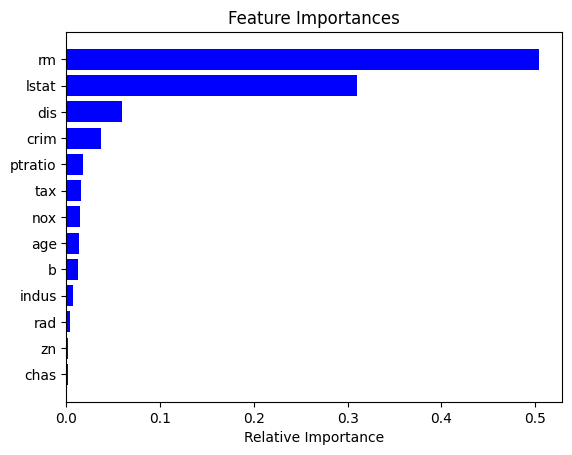

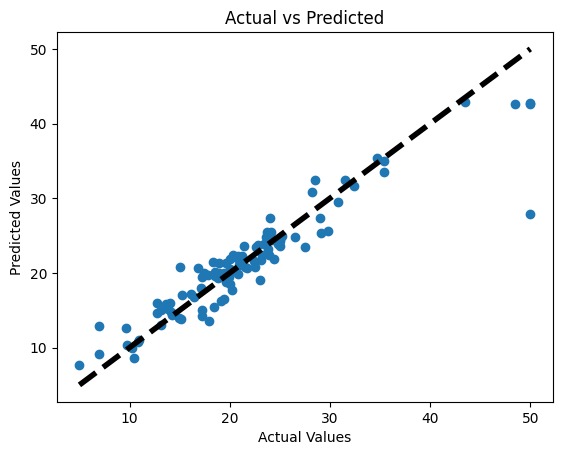

In [125]:
#visualisation des résultats du meilleurs modèle après optimisation
best_rf = grid_search.best_estimator_
print("Meilleur modèle:", grid_search.best_params_)

# Performance du meilleur modèle
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error du meilleur modèle:", mse)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Ligne parfaite pour référence
plt.show()

In [134]:
#reprise des données

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [143]:
#Modèle SVR de prédiction
# Création du modèle SVR
svr = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.5)

# Entraînement du modèle
svr.fit(X_train_scaled, y_train)


SVR(C=10, epsilon=0.5, gamma=0.1)

Mean Squared Error du meilleur modèle: 75.96823676175512
R² Score: -0.03592414693338131


/Users/raph4/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


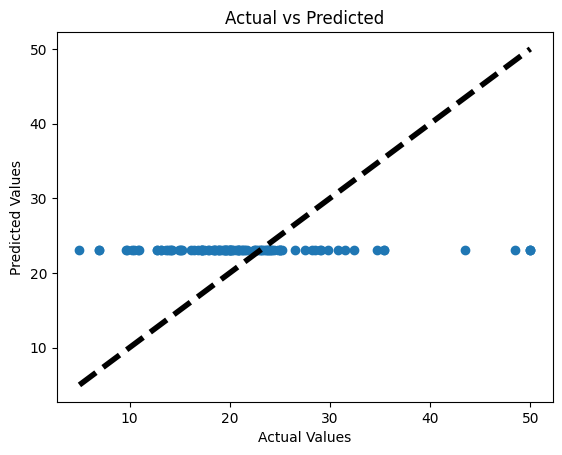

In [144]:
#Visualisation des résultats
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error du meilleur modèle:", mse)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Ligne parfaite pour référence
plt.show()

In [132]:
#Tentative d'optimisation des hyperparamètres pour le modèle SVR

# Définition de la grille de paramètres
param_grid = {
    'C': [ 100,150,250,500],
    'gamma': [ 0.1, 0.05,0.025,0.01],
    'epsilon': [0.9,0.75, 0.5, 0.1],
    'kernel': ['rbf']
}

# Création de la recherche sur grille
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Entraînement
grid_search.fit(X_train_scaled, y_train)

# Meilleurs paramètres et score
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score:", -grid_search.best_score_)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ..........C=100, epsilon=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=100, epsilon=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=100, epsilon=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=100, epsilon=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=100, epsilon=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.9, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.9, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.9, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.9, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.9, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.9, gamma=0.025, kernel=rbf; total time=   0.0s
[CV] END ........C=100, epsilon=0.9, gamma=0.02

Meilleur modèle: {'C': 250, 'epsilon': 0.5, 'gamma': 0.05, 'kernel': 'rbf'}
Mean Squared Error du meilleur modèle: 109.95443163119809
R² Score: -0.49936941601410023


/Users/raph4/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


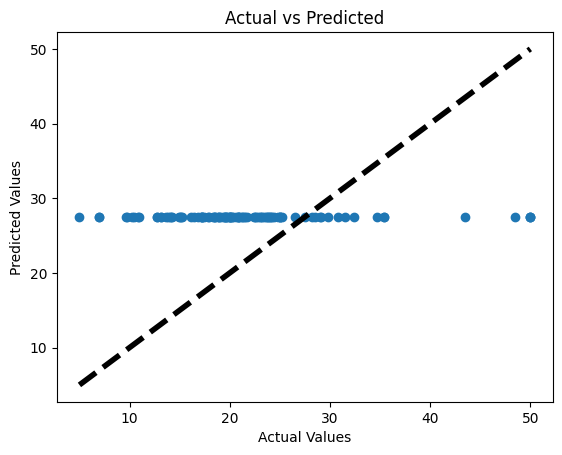

In [133]:
##Visualisation des résultats du meilleur modèle SVR 

best_rf = grid_search.best_estimator_
print("Meilleur modèle:", grid_search.best_params_)

# Performance du meilleur modèle
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error du meilleur modèle:", mse)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)





plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Ligne parfaite pour référence
plt.show()

In [145]:
 ##Reprise des données

X = data.drop('medv', axis=1)  # Supprimer la colonne cible pour obtenir les caractéristiques
y = data['medv']               # La colonne cible

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionnel: Standardisation des caractéristiques pour améliorer les performances
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [146]:
##Modèle de Gradient Boosting

# Création de l'instance du modèle de Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entraînement du modèle
gbr.fit(X_train_scaled, y_train)


GradientBoostingRegressor(random_state=42)

Mean Squared Error: 6.240173122766323
R² Score: 0.914907252103386


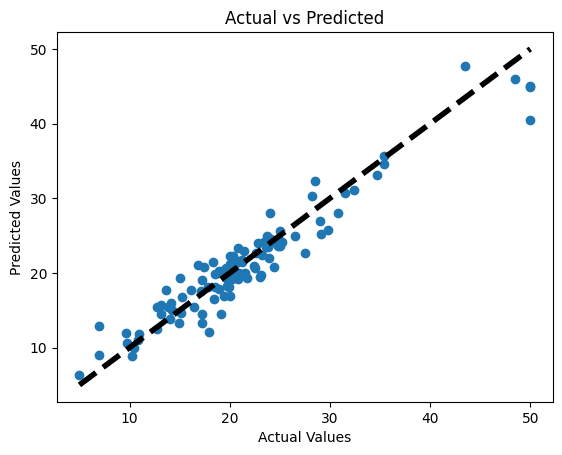

In [147]:
#Visualisation des performances

# Prédiction sur l'ensemble de test
y_pred = gbr.predict(X_test_scaled)

# Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Ligne parfaite pour référence
plt.show()

In [148]:
##Optimisation des hyperparamètres du modèle de Gradient boosting

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print("Meilleurs paramètres:", grid_search.best_params_)


Meilleurs paramètres: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}


Mean Squared Error: 6.559741571067656
R² Score: 0.9105495272659438


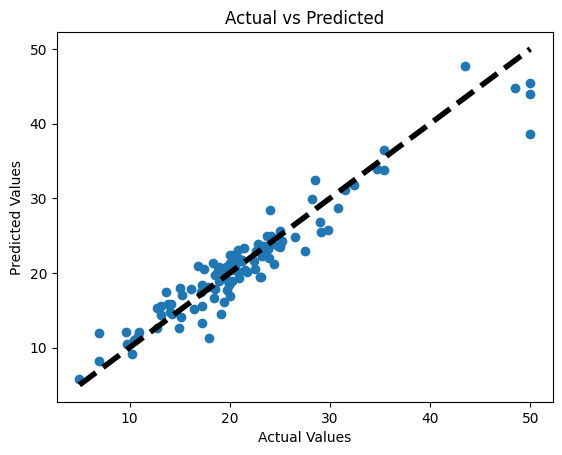

In [149]:
#Utilisation du meilleur modèle et résultats

# Création de l'instance du modèle de Gradient Boosting
opti_gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42)

# Entraînement du modèle
opti_gbr.fit(X_train_scaled, y_train)
# Prédiction sur l'ensemble de test
y_pred = opti_gbr.predict(X_test_scaled)

# Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Ligne parfaite pour référence
plt.show()

In [150]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [151]:
import xgboost as xgb

# Préparation des données
data_dmatrix = xgb.DMatrix(data=X,label=y)

# Configuration des paramètres
params = {"booster":"gbtree", "objective":"reg:squarederror"}

# Entraînement du modèle
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

# Prédiction
y_pred = xg_reg.predict(data_dmatrix)


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/raph4/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <BBC4A126-D15A-3802-AD26-108872BA781A> /Users/raph4/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]
